In [6]:

import csv
from functools import reduce
import matplotlib.pyplot as plt


with open("D:\data science\score_mini project.csv","r") as f:
    cvs_reader=csv.DictReader(f)
    name_reader=list(cvs_reader)

stu_newdata={}

for i in name_reader:
    stu_newdata[i['CityTown']]=stu_newdata.get(i['CityTown'],[])+[i["Total"]]

for key,value in stu_newdata.items():
    print(f'{key}   :   {value}')

#finding the average of total marks obtained by the student city wise
average_marks_citywise={}

for key,value in stu_newdata.items():
    sum_marks=0
    for i in value:
        sum_marks+=int(i)
    average_marks_citywise[key]=((sum_marks/len(value))/300)*100


    

print(average_marks_citywise)


Erode   :   ['210', '261']
Salem   :   ['198']
Chennai   :   ['188', '173', '247', '204', '187', '210', '254', '227']
Madurai   :   ['240', '227', '174', '209', '240']
Ambur   :   ['250']
Vellore   :   ['252', '252', '219']
Bengaluru   :   ['189', '224', '281', '221', '276']
Trichy   :   ['244', '216', '196']
Theni   :   ['224']
Nagercoil   :   ['181']
{'Erode': 78.5, 'Salem': 66.0, 'Chennai': 70.41666666666667, 'Madurai': 72.66666666666667, 'Ambur': 83.33333333333334, 'Vellore': 80.33333333333333, 'Bengaluru': 79.39999999999999, 'Trichy': 72.88888888888889, 'Theni': 74.66666666666667, 'Nagercoil': 60.333333333333336}


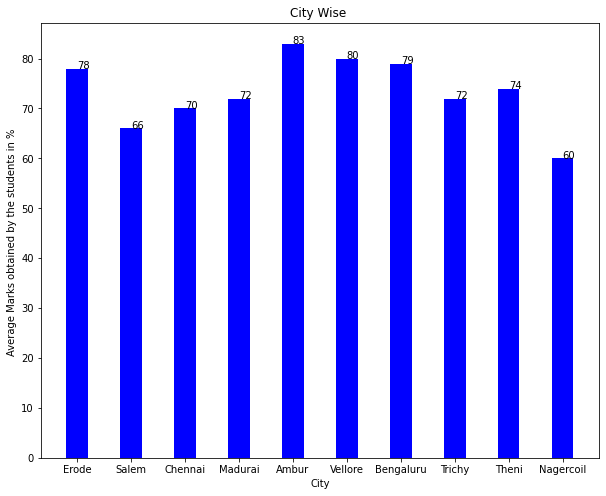

In [7]:

import matplotlib.pyplot as plt
#ploting the bar chart for this 

city_list=list(average_marks_citywise.keys())
avrg_marks=list(map(int,average_marks_citywise.values()))


fig=plt.figure(figsize=(10,8))

plt.bar(city_list,avrg_marks,width=0.4,color="Blue",label="city")
for index,value in enumerate(avrg_marks):
    plt.text(index,value,str(value))
plt.xlabel("City")
plt.ylabel("Average Marks obtained by the students in % ")

plt.title("City Wise ")

plt.show()

{'M': ['210', '198', '188', '250', '252', '189', '224', '281', '227', '216', '210', '196', '252', '174', '227', '209', '219'], 'F': ['173', '240', '247', '204', '187', '244', '224', '261', '221', '181', '276', '254', '240']}


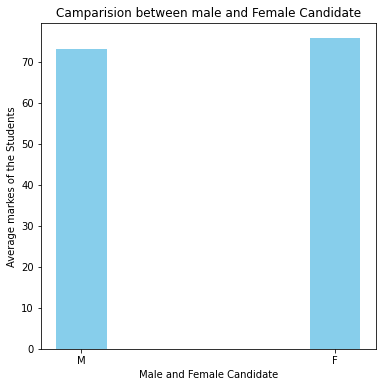

In [8]:
male_female={}
for i in name_reader:
    male_female[i["Gender"]]=male_female.get(i["Gender"],[])+[i["Total"]]

print(male_female)

#Finding average marks obtained by Male candidate vs Female Cand
Avrg_male_female_marks={}

for key,value in male_female.items():
    sum_m=0
    for i in value:
        sum_m+=int(i)
    Avrg_male_female_marks[key]=((sum_m/len(value))/300)*100

no_male_Female_cand=Avrg_male_female_marks.keys()
avg_marks_male_fema=Avrg_male_female_marks.values()

fig=plt.figure(figsize=(6,6))

plt.bar(no_male_Female_cand,avg_marks_male_fema,width=0.2,color='Skyblue')

plt.xlabel("Male and Female Candidate")
plt.ylabel("Average markes of the Students")

plt.title("Camparision between male and Female Candidate")

plt.show()

Maximum Marks secured by   :Rahul and his  marks is: 281 and the city that he belongs to Bengaluru 


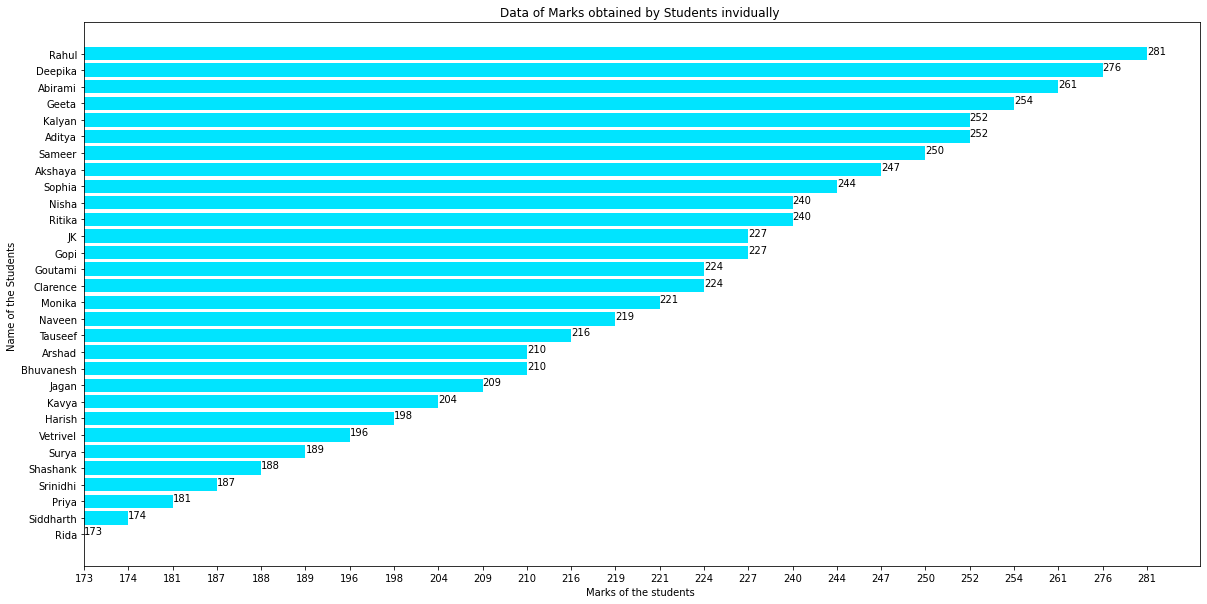

It is a plattyKurtic data and there is no outlier present in it 2.1501958513233115


In [9]:
#Finding name of students who has obtained maximum marks



max_marks={}
for i in name_reader:
    max_marks[i["Name"]]=max_marks.get(i["Name"],[])+[i['Total']]



# I am sorting the dictionary in ascending order 

sort_data = sorted(max_marks.items(), key=lambda x: x[1])
sort_data = dict(sort_data)
stud_name=''
mark_stu=''
for i in range(len(sort_data)):
    stud_name=max(sort_data,key=sort_data.get)
    mark_stu=list(map(int,sort_data[stud_name]))



#making top marks as per city record

city_name_topper={}

for i in name_reader:
    city_name_topper[i["CityTown"]]=city_name_topper.get(i["CityTown"],[])+[i["Total"]]
city_sor=sorted(city_name_topper.items(),key=lambda x: x[1])
city_sor=dict(city_sor)


#Identifying the city and name and marks of the student 


for key,value in city_sor.items():
    for j in value:
        if j==str(mark_stu[0]):
            print(f"Maximum Marks secured by   :{stud_name} and his  marks is: {mark_stu[0]} and the city that he belongs to {key} ")





#making new lists of keys and values
#  
max_keys=list(sort_data.keys())
marks=list(sort_data.values())
#converting list of list or string into integer
new_marks_list=[]# marks of the student individually 
for i in marks:
    for j in i:
        new_marks_list.append(j)

#///////////////Ploting Image/////////////////////////////

fig=plt.figure(figsize=(20,10))

plt.barh(max_keys,new_marks_list,color="#00e4ff")
for index, value in enumerate(new_marks_list):#basically enumerate return the index of the list and element present in that paticular index 
    plt.text(value, index,
             str(value))

plt.ylabel("Name of the Students ")
plt.xlabel("Marks of the students ")
plt.title("Data of Marks obtained by Students invidually ")


plt.show()


#finding the kurtosis

from kurtoses import kurt 


new_marks_list=list(map(int,new_marks_list))
measure_kurt=kurt(new_marks_list)

if measure_kurt<3:
    print(f"It is a plattyKurtic data and there is no outlier present in it {measure_kurt}")
elif measure_kurt>3:
    print(f"It is a leptokurtic data and there is extreme outlier present in it {measure_kurt}")
elif measure_kurt==3:
    print(f"It is a Mesokurtic data and there is Very less  outlier present in it {measure_kurt}")





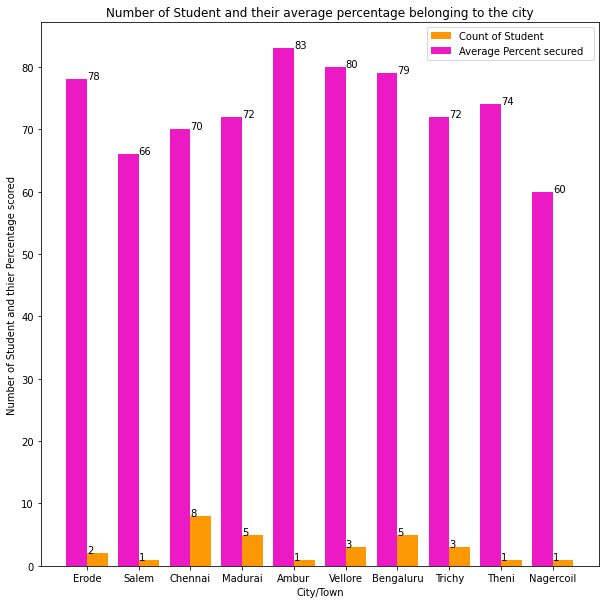

In [10]:
#count number of total student present in the city 


import numpy as np

town_stude={}

for i in name_reader:
    town_stude[i['CityTown']]=town_stude.get(i['CityTown'],[])+[i["Name"]]



value_dic={}

for key,value in town_stude.items():
    
    cnt=len(value)
    value_dic[key]=cnt

list_of_city=value_dic.keys()
no_of_student=value_dic.values()

fig=plt.figure(figsize=(10,10))
x_axis=np.arange(len(list_of_city))
plt.bar(x_axis +0.2,no_of_student, width=0.4, color="#fc9803",label="Count of Student")
for index,value in enumerate(no_of_student):
    plt.text(index,value,str(value))
plt.bar(x_axis -0.2,avrg_marks, width=0.4, color="#eb1ac4",label="Average Percent secured  ")
for index,value in enumerate(avrg_marks):
    plt.text(index,value,str(value))
plt.xticks(x_axis,list_of_city)

plt.ylabel("Number of Student and thier Percentage scored")
plt.xlabel("City/Town")
plt.title("Number of Student and their average percentage belonging to the city")
plt.legend()
plt.show()

Now extracting the marks of each subjects individually Mathematics ,Physics, Chemistry w.r.t Name 

{'Erode': 70.0, 'Salem': 62.0, 'Chennai': 63.625, 'Madurai': 70.2, 'Ambur': 81.0, 'Vellore': 83.0, 'Bengaluru': 81.8, 'Trichy': 77.33333333333333, 'Theni': 76.0, 'Nagercoil': 62.0}
Value of Kurtosis for physics  is 3.0605786012254157
Value of Kurtosis for Chemistry  is 2.437897088209877
Value of Kurtosis for Mathematics  is 1.4941533000501062


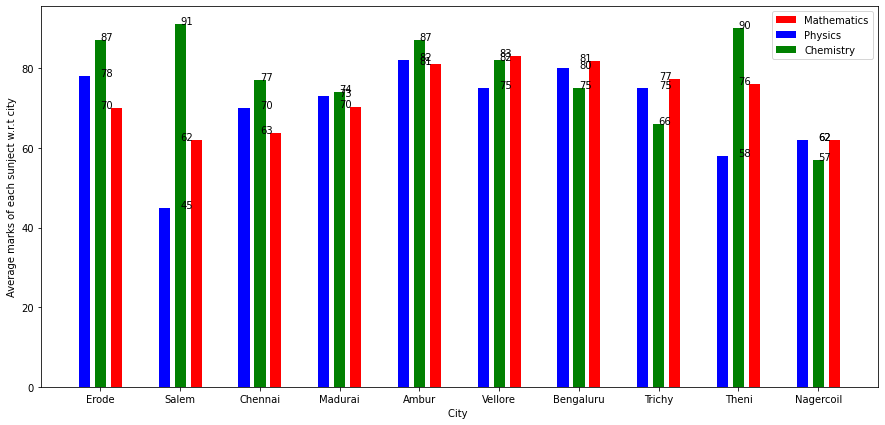

In [14]:

from mean_median_mode_variance_range import *


mathematics={}

for i in name_reader:
    mathematics[i["CityTown"]]=mathematics.get(i["CityTown"],[])+[i["Mathematics"]]

new_mathematics={}
city_maths=new_mathematics.keys()
mean_marks=new_mathematics.values()

for key,value in mathematics.items():
    sum=0
    for i in value:
        sum+=int(i)
    new_mathematics[key]=sum/len(value)
print(new_mathematics)
physics={}
for i in name_reader:
    physics[i["CityTown"]]=physics.get(i["CityTown"],[])+[i["Physics"]]



new_phy={}
for key,value in physics.items():
    sum=0
    for i in value:
        sum+=int(i)
    new_phy[key]=int(sum/len(value))

city_physics=new_phy.keys()
average_marks_phy=new_phy.values()

chemistry={}

for i in name_reader:
    chemistry[i["CityTown"]]=chemistry.get(i["CityTown"],[])+[i["Chemistry"]]

new_chem={}

for key,value in chemistry.items():
    sum=0
    for i in value:
        sum+=int(i)
    new_chem[key]=int(sum/len(value))

marks_chem=new_chem.values()

#finding the Kurtosis for Physics to check ouliers presen or not
marks_phy_int=list(map(int,average_marks_phy))
kurtosis_phy=kurt(marks_phy_int)
print(f"Value of Kurtosis for physics  is {kurtosis_phy}")

#finding the Kurtosis for Chemistry to check ouliers presen or not
marks_chem_int=list(map(int,marks_chem))
kurtosis_chem=kurt(marks_chem_int)
print(f"Value of Kurtosis for Chemistry  is {kurtosis_chem}")
#finding the Kurtosis for Mathematics to check ouliers presen or not
marks_math_int=list(map(int,mean_marks))
kurtosis_math=kurt(marks_math_int)
print(f"Value of Kurtosis for Mathematics  is {kurtosis_math}")



'''
name =mathematics.keys()
#Here marks_maths is a list of list and We have to convert it into a int and single list
marks_maths=mathematics.values()
#conversion done
marks_mathematic=[]

for i in marks_maths:

    for j in i:
        marks_mathematic.append(int(j))
print(marks_mathematic)

mode_maths=mean_meadian_mode(marks_mathematic,"2")
print(mode_maths)
mean_maths=int(mean_meadian_mode(marks_mathematic,"1"))
print(mean_maths)
'''

city_maths=new_mathematics.keys()
mean_marks=new_mathematics.values()

fig=plt.figure(figsize=(15,7))
x_ax=np.arange(len(city_maths))

plt.bar(x_ax +0.2,mean_marks,width=0.14,color="Red",label="Mathematics")
for index,value in enumerate(mean_marks):
    plt.text(index,value,str(int(value)))

plt.bar(x_ax-0.2,average_marks_phy,width=0.14,color="Blue",label="Physics")
for index,value in enumerate(average_marks_phy):
    plt.text(index,value,str(int(value)))

plt.bar(x_ax +0.0,marks_chem,width=0.14,color="Green",label="Chemistry")
for index,value in enumerate(marks_chem):
    plt.text(index,value,str(int(value)))

plt.xticks(x_ax,city_list)
plt.xlabel("City ")
plt.ylabel("Average marks of each sunject w.r.t city")

plt.legend()
plt.show()